Use the same dataset mpg.csv. Create a histogram for Acceleration using either Matplotlib or Seaborn

* x-axis should be acceleration and y-axis should be count
* The bin count should follow the cubed root of n rule: bins=int(round(df.Acceleration.count()**(1/3), 0)) (Think: what does this code mean?)
* Include the standard deviation, mean, skewness, and kurtosis as text on top of the histogram. (Look at 2.3: Embedded Text)
* Give the histogram a proper title and label axes correctly
* Embed your full name somewhere in the visualization 

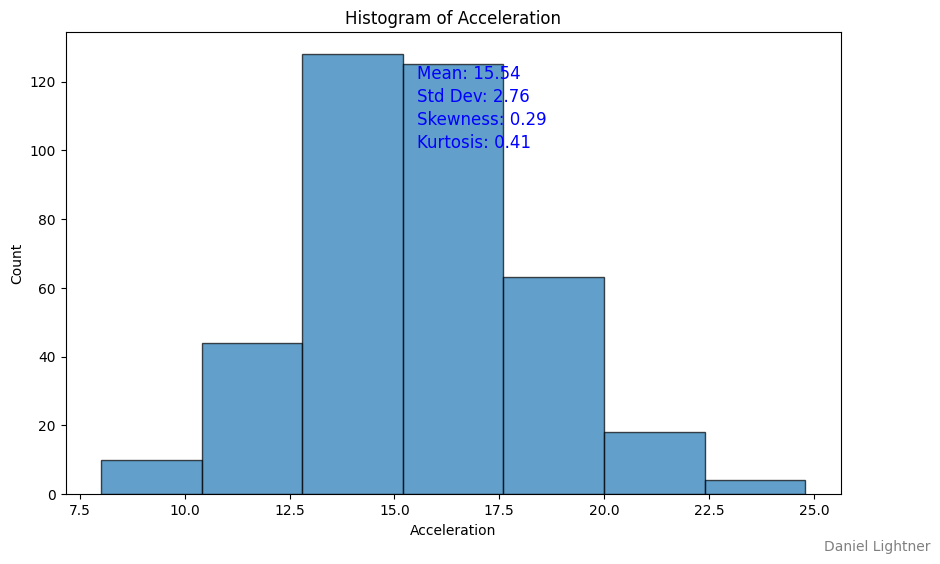

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('mpg.csv')

# Calculate statistics
mean_acceleration = df['Acceleration'].mean()
std_dev_acceleration = df['Acceleration'].std()

# Compute skewness
n = df['Acceleration'].dropna().count()
mean = df['Acceleration'].mean()
std_dev = df['Acceleration'].std()
skewness_acceleration = ((df['Acceleration'] - mean) ** 3).sum() / (n * std_dev ** 3)

# Compute kurtosis
kurtosis_acceleration = (((df['Acceleration'] - mean) ** 4).sum() / (n * std_dev ** 4)) - 3

# Compute the number of bins using the cubed root rule
n_bins = int(round(df['Acceleration'].count() ** (1 / 3), 0))

# Create the histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['Acceleration'].dropna(), bins=n_bins, edgecolor='black', alpha=0.7)

# Add text annotations
plt.text(mean_acceleration, plt.ylim()[1] * 0.9, f'Mean: {mean_acceleration:.2f}', fontsize=12, color='blue')
plt.text(mean_acceleration, plt.ylim()[1] * 0.85, f'Std Dev: {std_dev_acceleration:.2f}', fontsize=12, color='blue')
plt.text(mean_acceleration, plt.ylim()[1] * 0.80, f'Skewness: {skewness_acceleration:.2f}', fontsize=12, color='blue')
plt.text(mean_acceleration, plt.ylim()[1] * 0.75, f'Kurtosis: {kurtosis_acceleration:.2f}', fontsize=12, color='blue')

# Add labels and title
plt.xlabel('Acceleration')
plt.ylabel('Count')
plt.title('Histogram of Acceleration')
plt.figtext(0.99, 0.01, 'Daniel Lightner', horizontalalignment='right', verticalalignment='bottom', fontsize=10, color='gray')

# Show the plot
plt.show()


Create a stacked plot (histogram with a boxplot) using the Seaborn package

* Import the correct libraries you will need seaborn, pandas and pyplot (from matplotlib)
* You should create a boxplot that has cylinders as the x-axis and acceleration as the y-axis. Adjust sizes so that it looks clean and readable.
* Build a histogram for Acceleration that is divided by different numbers of Cylinders, but only inlcude cars with 4 and 8 cylinders.
  * HINT: consider using the orient="" parameter of the Seaborn .boxplot() object to make this look right. See documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html
* Embed your full name somewhere in the visualization


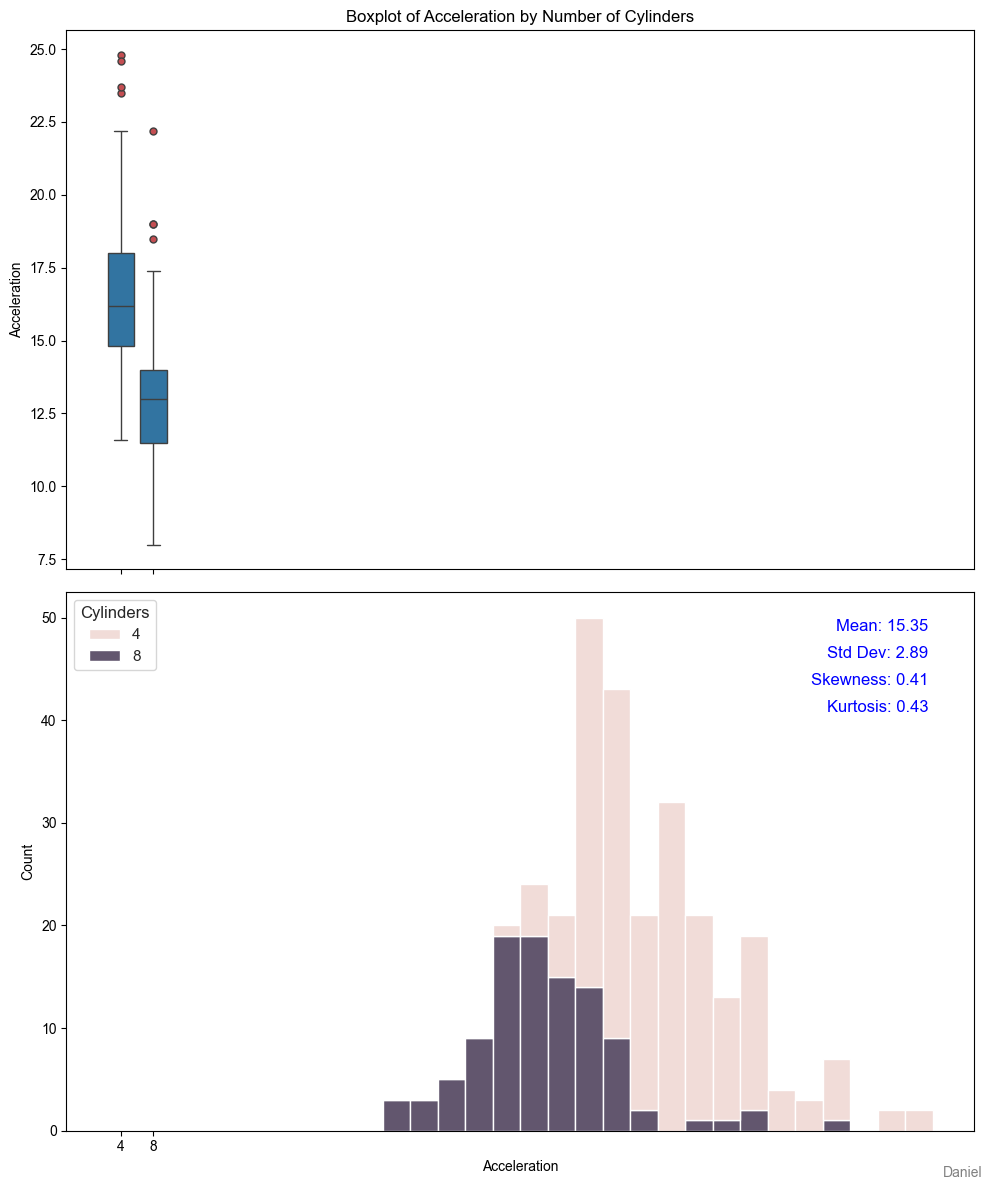

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('mpg.csv')

# Filter data to include only cars with 4 and 8 cylinders
df_filtered = df[df['Cylinders'].isin([4, 8])]

# Create a figure with 2 rows and 1 column of subplots
f, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Set the style for the plots
sns.set(style="ticks")

# Boxplot for acceleration by number of cylinders
sns.boxplot(x='Cylinders', y='Acceleration', data=df_filtered, ax=ax_box, orient='v',
            flierprops=dict(markerfacecolor='r', marker='o', markersize=5))

# Histogram for acceleration by number of cylinders
sns.histplot(data=df_filtered, x='Acceleration', hue='Cylinders', multiple='stack', bins=20, ax=ax_hist)

# Add text annotations for statistics (mean, std, skewness, kurtosis)
mean_acceleration = df_filtered['Acceleration'].mean()
std_dev_acceleration = df_filtered['Acceleration'].std()
skewness_acceleration = ((df_filtered['Acceleration'] - mean_acceleration) ** 3).sum() / (df_filtered['Acceleration'].count() * std_dev_acceleration ** 3)
kurtosis_acceleration = (((df_filtered['Acceleration'] - mean_acceleration) ** 4).sum() / (df_filtered['Acceleration'].count() * std_dev_acceleration ** 4)) - 3

# Add text annotations
ax_hist.text(0.95, 0.95, f'Mean: {mean_acceleration:.2f}', ha='right', va='top', transform=ax_hist.transAxes, fontsize=12, color='blue')
ax_hist.text(0.95, 0.90, f'Std Dev: {std_dev_acceleration:.2f}', ha='right', va='top', transform=ax_hist.transAxes, fontsize=12, color='blue')
ax_hist.text(0.95, 0.85, f'Skewness: {skewness_acceleration:.2f}', ha='right', va='top', transform=ax_hist.transAxes, fontsize=12, color='blue')
ax_hist.text(0.95, 0.80, f'Kurtosis: {kurtosis_acceleration:.2f}', ha='right', va='top', transform=ax_hist.transAxes, fontsize=12, color='blue')

# Set labels and title
ax_box.set_title('Boxplot of Acceleration by Number of Cylinders')
ax_box.set_xlabel('Number of Cylinders')
ax_box.set_ylabel('Acceleration')
ax_hist.set_xlabel('Acceleration')
ax_hist.set_ylabel('Count')

# Add your full name somewhere on the plot
plt.figtext(0.99, 0.01, 'Daniel', horizontalalignment='right', verticalalignment='bottom', fontsize=10, color='gray')

# Adjust layout and save
plt.tight_layout()
plt.savefig('stacked_plot.png', dpi=100)  # Save before showing
plt.show()
